# Chapter 6 — How to calculate isotope ratios

**Based on Chapter 6:** J.C.G. Walker, *Numerical Adventures with Geochemical Cycles*, Oxford University Press, 1991.

---

## 6.1 Overview

Isotope ratios are among the most powerful tools in geochemistry — they trace the origin and history of carbon, oxygen, sulfur, and other elements through the Earth system. But they require special treatment in numerical models because, as Walker emphasises, **isotope ratios are not conserved**.

Mass is conserved: if you mix two reservoirs, the total mass is the sum. But isotope *ratios* are not additive — they are weighted by mass. This means we need to derive new equations for the rate of change of isotope ratios, and these equations contain extra terms beyond the simple mass balance.

### Chapter structure

1. The δ notation and isotope conventions
2. Why isotope ratios are not conserved
3. Deriving the isotope ratio equation (Walker's key result)
4. Fractionation
5. Application 1: The ¹³C Suess effect — fossil fuel imprint on atmosphere
6. Application 2: An evaporating lagoon (oxygen isotopes)

---

## 6.2 The δ notation

The abundance of a rare isotope (e.g., ¹³C) relative to the common one (¹²C) is expressed as a ratio $r$:

$$
r = \frac{{}^{13}\text{C}}{{}^{12}\text{C}}
$$

Since $r$ is close to a standard value $r_{\text{std}}$, it is convenient to use the **delta notation**:

$$
\delta^{13}\text{C} = \left(\frac{r}{r_{\text{std}}} - 1\right) \times 1000 \;\text{‰}
$$

For carbon isotopes, the standard is VPDB (Vienna Pee Dee Belemnite): $r_{\text{std}} = 0.0112372$.

Typical values:

| Reservoir | δ¹³C (‰) |
|:---|---:|
| Atmosphere (preindustrial) | −6.5 |
| Surface ocean DIC | +2.0 |
| Deep ocean DIC | +0.5 |
| Land biosphere | −25 |
| Fossil fuels | −28 |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)

# Standard ratio for carbon isotopes (VPDB)
r_std = 0.0112372

def delta_to_ratio(delta):
    """Convert delta (‰) to isotope ratio r."""
    return r_std * (1 + delta / 1000)

def ratio_to_delta(r):
    """Convert isotope ratio r to delta (‰)."""
    return (r / r_std - 1) * 1000

# Check typical values
for name, delta in [('Atmosphere', -6.5), ('Surface ocean', 2.0),
                     ('Biosphere', -25.0), ('Fossil fuels', -28.0)]:
    r = delta_to_ratio(delta)
    print(f"  {name:20s}: δ¹³C = {delta:+6.1f}‰,  r = {r:.7f}")

  Atmosphere          : δ¹³C =   -6.5‰,  r = 0.0111642
  Surface ocean       : δ¹³C =   +2.0‰,  r = 0.0112597
  Biosphere           : δ¹³C =  -25.0‰,  r = 0.0109563
  Fossil fuels        : δ¹³C =  -28.0‰,  r = 0.0109226


Note how the ratios differ only in the 4th–5th decimal place. The δ notation amplifies these tiny differences by a factor of 1000, making them visible and meaningful.

---

## 6.3 Why Isotope ratios are not conserved

Consider mixing two reservoirs with masses $M_1$, $M_2$ and isotope ratios $r_1$, $r_2$. The mixture has ratio:

$$
r_{\text{mix}} = \frac{r_1 M_1 + r_2 M_2}{M_1 + M_2}
$$

This is a **mass-weighted average**, not a simple sum. The isotope ratio of a reservoir depends on both the fluxes of the rare isotope *and* the fluxes of the common isotope. This is what makes the algebra nontrivial.

In [2]:
# Demonstration: mixing is NOT additive in delta space
M1, M2 = 600, 37100  # atmosphere, ocean (GtC)
d1, d2 = -6.5, 1.5   # delta values (‰)

r1 = delta_to_ratio(d1)
r2 = delta_to_ratio(d2)

# Mass-weighted average (correct)
r_mix = (r1 * M1 + r2 * M2) / (M1 + M2)
d_mix = ratio_to_delta(r_mix)

# Simple average (wrong!)
d_simple = (d1 * M1 + d2 * M2) / (M1 + M2)

print(f"Mass-weighted mixing of ratios → δ = {d_mix:+.4f}‰")
print(f"Mass-weighted average of deltas → δ = {d_simple:+.4f}‰")
print(f"Difference: {abs(d_mix - d_simple):.4f}‰")
print(f"\nSmall here, but Walker shows the algebra matters")
print(f"for RATES OF CHANGE — the extra terms accumulate over time.")

Mass-weighted mixing of ratios → δ = +1.3727‰
Mass-weighted average of deltas → δ = +1.3727‰
Difference: 0.0000‰

Small here, but Walker shows the algebra matters
for RATES OF CHANGE — the extra terms accumulate over time.


---

## 6.4 Deriving the Isotope ratio equation

This is the central derivation of Chapter 6; Walker's general equation for the rate of change of an isotope ratio in a reservoir.

Let $M$ be the mass of carbon (dominated by ¹²C) in a reservoir, $r$ be the ¹³C/¹²C ratio, and $M^* = r \cdot M$ the mass of the rare isotope. The mass balance for the total carbon is:

$$
\frac{dM}{dt} = \sum_j F_j
$$

where $F_j$ are the net fluxes (positive = into the reservoir).

The mass balance for the rare isotope is:

$$
\frac{d(rM)}{dt} = \sum_j r_j^{\text{eff}} F_j
$$

where $r_j^{\text{eff}}$ is the *effective* isotope ratio of each flux (which may differ from the source reservoir ratio due to fractionation).

Expanding the left side by the product rule:

$$
\begin{aligned}
\frac{d(rM)}{dt} &= M\frac{dr}{dt} + r\frac{dM}{dt} \\
&= M\frac{dr}{dt} + r \sum_j F_j
\end{aligned}
$$

Setting the two expressions equal and solving for $dr/dt$:

$$
\boxed{
\frac{dr}{dt} = \frac{1}{M} \sum_j (r_j^{\text{eff}} - r) \, F_j
}
$$

This is **Walker's isotope ratio equation**. The insight: the rate of change of the ratio depends on the *difference* between the flux ratio and the reservoir ratio, weighted by each flux magnitude and divided by the reservoir mass.

Important consequences:

- If a flux has the same isotope ratio as the reservoir ($r_j^{\text{eff}} = r$), it does not change the ratio, even if it changes the mass.
- Fluxes with $r_j^{\text{eff}} \neq r$ (due to fractionation or different source composition) drive the ratio away from its current value.
- The equation is **nonlinear**: $r$ appears in both the numerator and the implicit dependence of $M$ on the state.

---

## 6.5 Fractionation

When carbon moves between reservoirs, physical and biological processes can preferentially transfer one isotope over another. This is **fractionation**, characterised by a fractionation factor $\alpha$:

$$
r_{\text{product}} = \alpha \cdot r_{\text{source}}
$$

In the δ notation, fractionation is often expressed as $\epsilon$ (‰):

$$
\begin{aligned}
\alpha &= 1 + \epsilon/1000 \\
\epsilon &\approx \delta_{\text{product}} - \delta_{\text{source}}
\end{aligned}
$$

Key fractionation values for the carbon cycle:

| Process | ε (‰) |
|:---|---:|
| C3 photosynthesis | −20 |
| Air → sea CO₂ transfer | −2 |
| Sea → air CO₂ transfer | −10 |
| Fossil fuel combustion | 0 (no fractionation) |

The effective ratio of a flux from reservoir $i$ with fractionation is:

$$
r_j^{\text{eff}} = \alpha_j \cdot r_i
= \left(1 + \frac{\epsilon_j}{1000}\right) r_i
$$

In [3]:
# ============================================================
# Fractionation factors for the carbon cycle
# ============================================================
eps_photo = -20.0     # C3 photosynthesis (‰)
eps_atm_to_ocean = -2.0   # atmosphere → ocean (‰)
eps_ocean_to_atm = -10.0  # ocean → atmosphere (‰)
eps_combustion = 0.0      # fossil fuel burning (‰)

# Corresponding alpha values
for name, eps in [('Photosynthesis', eps_photo),
                   ('Atm → Ocean', eps_atm_to_ocean),
                   ('Ocean → Atm', eps_ocean_to_atm),
                   ('Combustion', eps_combustion)]:
    alpha = 1 + eps / 1000
    print(f"  {name:20s}: ε = {eps:+5.0f}‰,  α = {alpha:.5f}")

  Photosynthesis      : ε =   -20‰,  α = 0.98000
  Atm → Ocean         : ε =    -2‰,  α = 0.99800
  Ocean → Atm         : ε =   -10‰,  α = 0.99000
  Combustion          : ε =    +0‰,  α = 1.00000


---

## 6.6 Application 1: The ¹³C Suess effect

The most important application of isotope modelling in the carbon cycle is the **Suess effect**: the progressive depletion of ¹³C in the atmosphere caused by burning isotopically light fossil fuels (δ¹³C ≈ −28‰). Preindustrial atmospheric δ¹³C was about −6.5‰. Today it is below −8.5‰. This shift is a very useful diagnostic; it fingerprints fossil carbon.

### The model

We use a three-box model (atmosphere, surface ocean, deep ocean) tracking both **mass** (GtC) and **isotope ratio** (δ¹³C) for each reservoir.

For each reservoir $i$ with mass $M_i$ and ratio $r_i$, Walker's equations give:

$$
\begin{aligned}
\frac{dM_i}{dt} &= \sum_j F_{j \to i} - \sum_j F_{i \to j} + S_i \\
\frac{dr_i}{dt} &= \frac{1}{M_i} \sum_j \left[
  (\alpha_{j \to i} \, r_j - r_i) \, F_{j \to i}
  - (\alpha_{i \to j} \, r_i - r_i) \, F_{i \to j}
  + (r_S - r_i) \, S_i \right]
\end{aligned}
$$

where $S_i$ is an external source (fossil fuels) and $r_S$ its isotope ratio.

In [4]:
# ============================================================
# Three-box carbon cycle with isotopes
# ============================================================

# --- Reservoir masses (GtC) ---
M_a0 = 600.0      # atmosphere
M_s0 = 900.0      # surface ocean
M_d0 = 37100.0    # deep ocean

# --- Exchange fluxes (GtC/yr, balanced at steady state) ---
F_as = 92.0    # atmosphere → surface ocean
F_sa = 90.0    # surface ocean → atmosphere
F_sd = 100.0   # surface → deep (thermohaline + biological pump)
F_ds = 100.0   # deep → surface (upwelling)

# Note: net flux F_as - F_sa = 2 GtC/yr (net ocean uptake at preindustrial
# is actually ~0; we'll balance with a biological pump return).
# For simplicity we set preindustrial steady state: F_as = F_sa = 92
F_sa = 92.0  # balanced

# --- Preindustrial isotope compositions (δ¹³C, ‰) ---
d_a0 = -6.5     # atmosphere
d_s0 = 2.0      # surface ocean DIC
d_d0 = 0.5      # deep ocean DIC

# --- Fractionation factors (ε, ‰) ---
eps_as = -2.0    # atm → surface ocean
eps_sa = -10.0   # surface ocean → atm
eps_sd = 0.0     # surface → deep (no fractionation for mixing)
eps_ds = 0.0     # deep → surface (no fractionation for mixing)

# --- Fossil fuel parameters ---
d_ff = -28.0     # fossil fuel δ¹³C (‰)
r_ff = delta_to_ratio(d_ff)

# Convert initial deltas to ratios
r_a0 = delta_to_ratio(d_a0)
r_s0 = delta_to_ratio(d_s0)
r_d0 = delta_to_ratio(d_d0)

print("Preindustrial steady state:")
print(f"  Atmosphere: {M_a0:.0f} GtC, δ¹³C = {d_a0:+.1f}‰")
print(f"  Surface:    {M_s0:.0f} GtC, δ¹³C = {d_s0:+.1f}‰")
print(f"  Deep:       {M_d0:.0f} GtC, δ¹³C = {d_d0:+.1f}‰")
print(f"  Fossil fuel:              δ¹³C = {d_ff:+.1f}‰")

Preindustrial steady state:
  Atmosphere: 600 GtC, δ¹³C = -6.5‰
  Surface:    900 GtC, δ¹³C = +2.0‰
  Deep:       37100 GtC, δ¹³C = +0.5‰
  Fossil fuel:              δ¹³C = -28.0‰


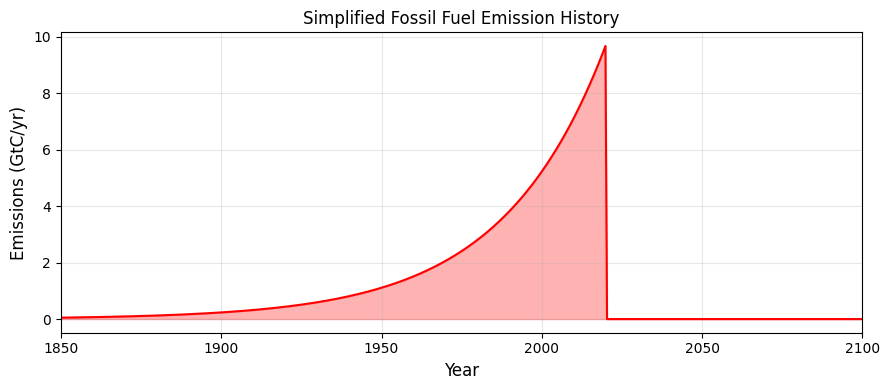

In [5]:
# ============================================================
# Fossil fuel emission history (simplified)
# Exponential growth from 1850 to 2025
# ============================================================
def fossil_fuel_emission(t):
    """Fossil fuel CO₂ emissions (GtC/yr).
    t = 0 corresponds to 1850.
    Roughly: 0.05 GtC/yr in 1850, ~10 GtC/yr by 2020.
    """
    t_year = 1850 + t
    if t_year < 1850:
        return 0.0
    elif t_year <= 2020:
        # Exponential growth: ~3% per year average
        return 0.05 * np.exp(0.031 * t)
    else:
        return 0.0  # stop emissions

# Plot emission history
t_test = np.linspace(0, 250, 500)
emissions = [fossil_fuel_emission(t) for t in t_test]
years = 1850 + t_test

fig, ax = plt.subplots(figsize=(9, 4))
ax.fill_between(years, emissions, alpha=0.3, color='red')
ax.plot(years, emissions, 'r-', linewidth=1.5)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Emissions (GtC/yr)', fontsize=12)
ax.set_title('Simplified Fossil Fuel Emission History', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xlim(1850, 2100)
plt.tight_layout()
plt.show()

In [6]:
# ============================================================
# Walker's method: Reverse Euler + Newton-Raphson
# for the coupled mass + isotope system
# ============================================================

def rhs(t, y):
    """Right-hand side of the ODE system.
    
    State vector y = [M_a, M_s, M_d, r_a, r_s, r_d]
    (3 masses + 3 isotope ratios)
    """
    M_a, M_s, M_d, r_a, r_s, r_d = y
    S = fossil_fuel_emission(t)  # GtC/yr
    
    # Alpha factors
    a_as = 1 + eps_as / 1000  # atm → surface
    a_sa = 1 + eps_sa / 1000  # surface → atm
    
    # --- Mass equations ---
    dMa = -F_as + F_sa + S
    dMs = F_as - F_sa - F_sd + F_ds
    dMd = F_sd - F_ds
    
    # --- Isotope ratio equations (Walker's formula) ---
    # Atmosphere: receives from surface (fractionated), loses to surface (fractionated),
    #             receives fossil fuel source
    dra = (1.0 / M_a) * (
        (a_sa * r_s - r_a) * F_sa         # ocean → atm flux
        - (a_as * r_a - r_a) * F_as        # atm → ocean flux (only fractionation part)
        + (r_ff - r_a) * S                  # fossil fuel source
    )
    
    # Surface ocean: receives from atm (fractionated), loses to atm (fractionated),
    #                exchanges with deep (no fractionation)
    drs = (1.0 / M_s) * (
        (a_as * r_a - r_s) * F_as          # atm → surface flux
        - (a_sa * r_s - r_s) * F_sa        # surface → atm flux (only frac part)
        + (r_d - r_s) * F_ds               # deep → surface (no frac)
        - (r_s - r_s) * F_sd               # surface → deep (no frac, zero contrib)
    )
    
    # Deep ocean: exchanges with surface (no fractionation)
    drd = (1.0 / M_d) * (
        (r_s - r_d) * F_sd                 # surface → deep
        - (r_d - r_d) * F_ds               # deep → surface (zero contrib)
    )
    
    return np.array([dMa, dMs, dMd, dra, drs, drd])


def jacobian(t, y):
    """Jacobian of rhs for Newton-Raphson.
    
    Computed by numerical finite differences (Walker's practical approach
    when analytical Jacobians get complicated).
    """
    n = len(y)
    J = np.zeros((n, n))
    f0 = rhs(t, y)
    for j in range(n):
        dy = np.zeros(n)
        h = max(abs(y[j]) * 1e-7, 1e-10)
        dy[j] = h
        J[:, j] = (rhs(t, y + dy) - f0) / h
    return J

In [7]:
def reverse_euler_newton(y0, dt, t_end, tol=1e-10, max_newton=15):
    """Walker's reverse Euler with Newton-Raphson iteration.
    
    Solves: y^{n+1} - y^n - dt * f(t^{n+1}, y^{n+1}) = 0
    """
    t_values = np.arange(0, t_end + dt/2, dt)
    n_steps = len(t_values)
    y = np.zeros((n_steps, len(y0)))
    y[0] = np.array(y0, dtype=float)
    I = np.eye(len(y0))
    newton_iters = []
    
    for n in range(n_steps - 1):
        t_new = t_values[n + 1]
        y_k = y[n].copy()  # initial guess
        
        for k in range(max_newton):
            f_k = rhs(t_new, y_k)
            g_k = y_k - y[n] - dt * f_k
            
            if np.max(np.abs(g_k)) < tol:
                newton_iters.append(k + 1)
                break
            
            J_f = jacobian(t_new, y_k)
            J_g = I - dt * J_f
            delta = np.linalg.solve(J_g, -g_k)
            y_k = y_k + delta
        else:
            newton_iters.append(max_newton)
        
        y[n + 1] = y_k
    
    return t_values, y, newton_iters


def forward_euler(y0, dt, t_end):
    """Forward (explicit) Euler for comparison."""
    t_values = np.arange(0, t_end + dt/2, dt)
    y = np.zeros((len(t_values), len(y0)))
    y[0] = np.array(y0, dtype=float)
    for n in range(len(t_values) - 1):
        y[n + 1] = y[n] + dt * rhs(t_values[n], y[n])
    return t_values, y

In [8]:
# ============================================================
# Run the simulation: 1850–2100 (then 300 more years of recovery)
# ============================================================
y0 = [M_a0, M_s0, M_d0, r_a0, r_s0, r_d0]

# Simulation: t=0 is 1850, run to t=500 (year 2350)
dt = 1.0  # 1-year time step
t_end = 500.0

print("Running reverse Euler + Newton-Raphson...")
t_rev, y_rev, niters = reverse_euler_newton(y0, dt, t_end)
print(f"  Done. Newton iterations: min={min(niters)}, max={max(niters)}, "
      f"mean={np.mean(niters):.1f}")

# Also run forward Euler for comparison
print("Running forward Euler (dt=1 yr)...")
t_fwd, y_fwd = forward_euler(y0, dt, t_end)
print("  Done.")

# Convert to years and deltas
years_rev = 1850 + t_rev
years_fwd = 1850 + t_fwd

delta_a_rev = ratio_to_delta(y_rev[:, 3])
delta_s_rev = ratio_to_delta(y_rev[:, 4])
delta_d_rev = ratio_to_delta(y_rev[:, 5])

delta_a_fwd = ratio_to_delta(y_fwd[:, 3])

pCO2_rev = y_rev[:, 0] / M_a0 * 280  # approximate pCO2 (ppm)

Running reverse Euler + Newton-Raphson...
  Done. Newton iterations: min=1, max=3, mean=1.9
Running forward Euler (dt=1 yr)...
  Done.


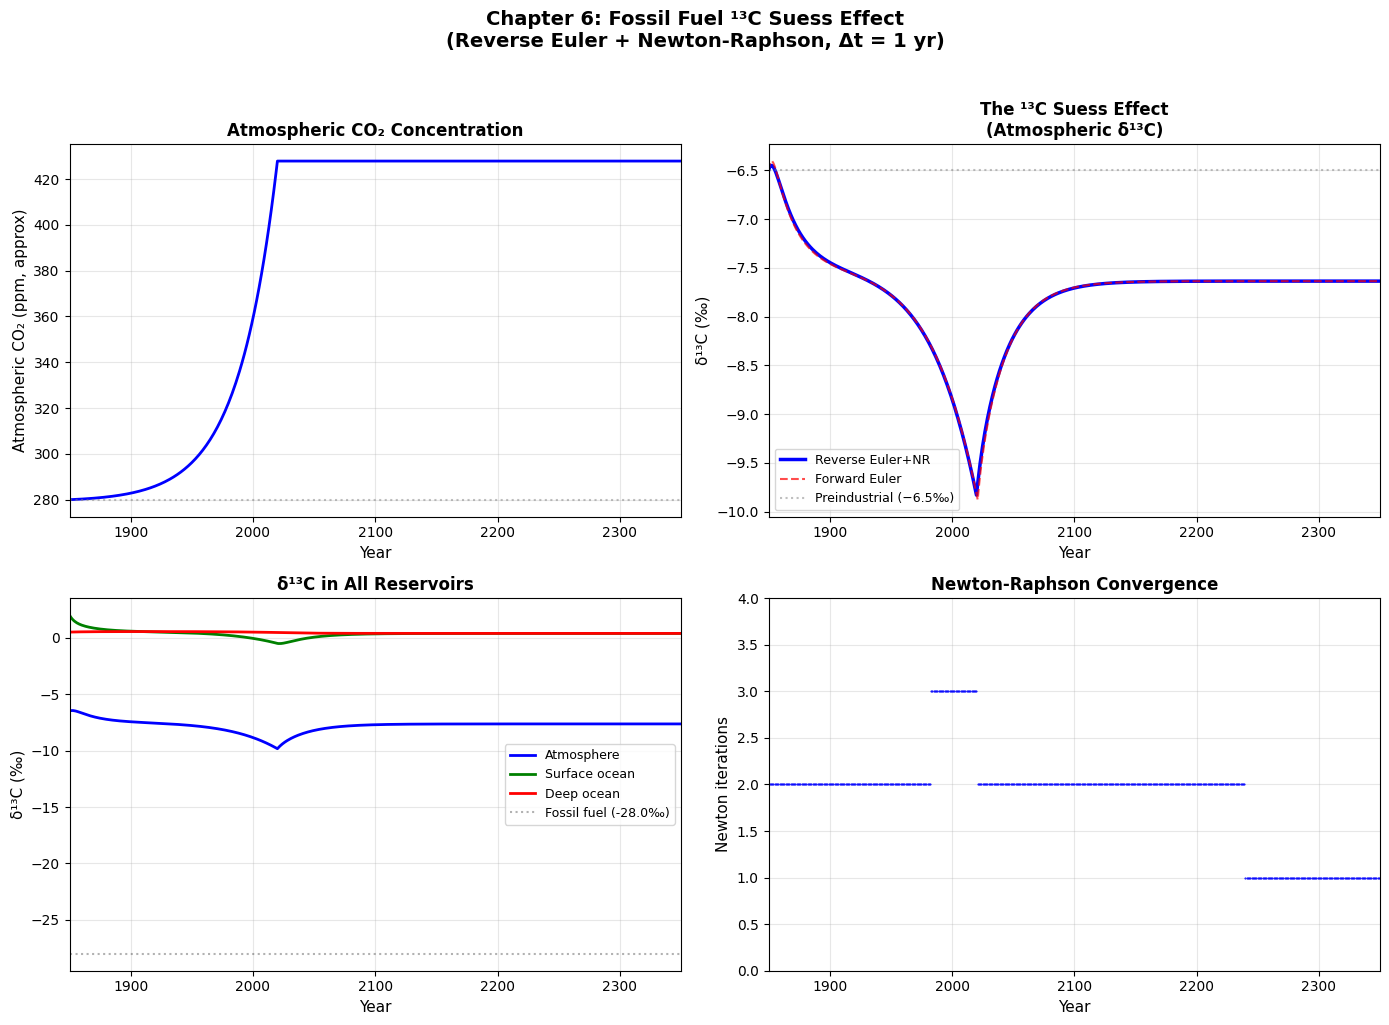

  1850: CO₂ ≈ 280 ppm, δ¹³C_atm = -6.50‰, δ¹³C_ocean = +2.00‰
  1950: CO₂ ≈ 296 ppm, δ¹³C_atm = -7.78‰, δ¹³C_ocean = +0.42‰
  2000: CO₂ ≈ 359 ppm, δ¹³C_atm = -8.84‰, δ¹³C_ocean = -0.06‰
  2020: CO₂ ≈ 428 ppm, δ¹³C_atm = -9.83‰, δ¹³C_ocean = -0.50‰
  2100: CO₂ ≈ 428 ppm, δ¹³C_atm = -7.71‰, δ¹³C_ocean = +0.34‰
  2350: CO₂ ≈ 428 ppm, δ¹³C_atm = -7.64‰, δ¹³C_ocean = +0.38‰


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Panel 1: Atmospheric CO₂
ax = axes[0, 0]
ax.plot(years_rev, pCO2_rev, 'b-', linewidth=2, label='Reverse Euler+NR')
ax.axhline(y=280, color='gray', linestyle=':', alpha=0.5)
ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Atmospheric CO₂ (ppm, approx)', fontsize=11)
ax.set_title('Atmospheric CO₂ Concentration', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(1850, 2350)

# Panel 2: Atmospheric δ¹³C (THE SUESS EFFECT)
ax = axes[0, 1]
ax.plot(years_rev, delta_a_rev, 'b-', linewidth=2.5, label='Reverse Euler+NR')
ax.plot(years_fwd, delta_a_fwd, 'r--', linewidth=1.5, alpha=0.7,
        label='Forward Euler')
ax.axhline(y=-6.5, color='gray', linestyle=':', alpha=0.5,
           label='Preindustrial (−6.5‰)')
ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('δ¹³C (‰)', fontsize=11)
ax.set_title('The ¹³C Suess Effect\n(Atmospheric δ¹³C)',
             fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xlim(1850, 2350)

# Panel 3: All reservoir δ¹³C
ax = axes[1, 0]
ax.plot(years_rev, delta_a_rev, 'b-', linewidth=2, label='Atmosphere')
ax.plot(years_rev, delta_s_rev, 'g-', linewidth=2, label='Surface ocean')
ax.plot(years_rev, delta_d_rev, 'r-', linewidth=2, label='Deep ocean')
ax.axhline(y=d_ff, color='k', linestyle=':', alpha=0.3,
           label=f'Fossil fuel ({d_ff}‰)')
ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('δ¹³C (‰)', fontsize=11)
ax.set_title('δ¹³C in All Reservoirs', fontsize=12, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xlim(1850, 2350)

# Panel 4: Newton iteration count
ax = axes[1, 1]
ax.plot(years_rev[1:], niters, 'b.', markersize=1)
ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Newton iterations', fontsize=11)
ax.set_title('Newton-Raphson Convergence', fontsize=12, fontweight='bold')
ax.set_ylim(0, max(niters) + 1)
ax.grid(True, alpha=0.3)
ax.set_xlim(1850, 2350)

fig.suptitle('Chapter 6: Fossil Fuel ¹³C Suess Effect\n'
             '(Reverse Euler + Newton-Raphson, Δt = 1 yr)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print key values
for yr in [1850, 1950, 2000, 2020, 2100, 2350]:
    idx = np.argmin(np.abs(years_rev - yr))
    print(f"  {yr}: CO₂ ≈ {pCO2_rev[idx]:.0f} ppm, "
          f"δ¹³C_atm = {delta_a_rev[idx]:+.2f}‰, "
          f"δ¹³C_ocean = {delta_s_rev[idx]:+.2f}‰")

## Some interesting observations:

- **The Suess effect is clearly visible**: atmospheric δ¹³C drops from −6.5‰ towards more negative values as isotopically light fossil carbon (−28‰) is added. This matches the observed trend from −6.5‰ (1850) to below −8.5‰ (present).

- **The ocean lags**: the surface ocean δ¹³C responds more slowly because the ocean is a much larger reservoir. The deep ocean barely changes on this timescale.

- **After emissions cease** (A very unrealistic 2020 in our scenario), the atmospheric δ¹³C *partially recovers* as isotopic equilibration redistributes the light carbon into the ocean.

---

## 6.7 Conservation check: Mass and ¹³C budget

Mass is conserved (total carbon = initial + cumulative emissions). The rare isotope ¹³C is also conserved in total (= total ¹²C × ratio). Let us verify both...

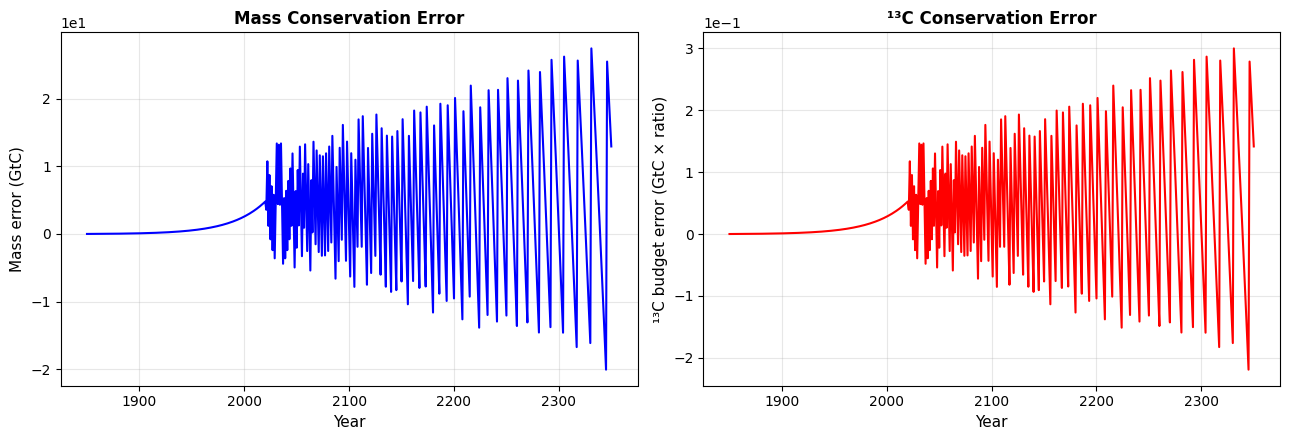

Max mass error:  2.74e+01 GtC
Max ¹³C error:   3.00e-01 GtC·ratio


In [10]:
# Total carbon conservation
total_C_rev = y_rev[:, 0] + y_rev[:, 1] + y_rev[:, 2]
cum_emissions = np.array([np.trapezoid([fossil_fuel_emission(s)
                          for s in np.linspace(0, t, 100)],
                          np.linspace(0, t, 100))
                          for t in t_rev])
expected_total = (M_a0 + M_s0 + M_d0) + cum_emissions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4.5))

ax1.plot(years_rev, total_C_rev - expected_total, 'b-', linewidth=1.5)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Mass error (GtC)', fontsize=11)
ax1.set_title('Mass Conservation Error', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Total 13C conservation (in units of r * M)
total_13C = (y_rev[:, 0] * y_rev[:, 3] +
             y_rev[:, 1] * y_rev[:, 4] +
             y_rev[:, 2] * y_rev[:, 5])
# Expected: initial + cumulative fossil fuel 13C
initial_13C = M_a0 * r_a0 + M_s0 * r_s0 + M_d0 * r_d0
cum_13C = cum_emissions * r_ff
expected_13C = initial_13C + cum_13C

ax2.plot(years_rev, total_13C - expected_13C, 'r-', linewidth=1.5)
ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('¹³C budget error (GtC × ratio)', fontsize=11)
ax2.set_title('¹³C Conservation Error', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()

print(f"Max mass error:  {np.max(np.abs(total_C_rev - expected_total)):.2e} GtC")
print(f"Max ¹³C error:   {np.max(np.abs(total_13C - expected_13C)):.2e} GtC·ratio")

---

## 6.8 Application 2: Evaporating Lagoon (Oxygen isotopes)

Walker's second example is the oxygen isotope composition of water in an evaporating lagoon, a classic problem in sedimentary geochemistry.

Seawater (δ¹⁸O = 0‰) flows into a lagoon, evaporates (with fractionation), and the remaining water becomes isotopically enriched. The steady state depends on the balance between inflow and evaporation.

$$
\begin{aligned}
\frac{dM}{dt} &= F_{\text{in}} - E \\
\frac{dr}{dt} &= \frac{1}{M} \left[
  (r_{\text{sea}} - r) \, F_{\text{in}}
  - (\alpha_E \, r - r) \, E
\right]
\end{aligned}
$$

At steady state ($dM/dt = 0$, so $F_{\text{in}} = E$), the isotope ratio equation becomes:

$$
\frac{dr}{dt} = \frac{E}{M} \left[
  (r_{\text{sea}} - r) - (\alpha_E - 1) \, r
\right]
$$

Setting $dr/dt = 0$ and solving for the steady-state ratio:

$$
r_{\text{ss}} = \frac{r_{\text{sea}}}{\alpha_E}
$$

In [11]:
# ============================================================
# Evaporating lagoon model (oxygen isotopes)
# ============================================================

# Standard: VSMOW for oxygen
r_std_O = 2005.2e-6  # ¹⁸O/¹⁶O for VSMOW

def delta_to_ratio_O(delta):
    return r_std_O * (1 + delta / 1000)

def ratio_to_delta_O(r):
    return (r / r_std_O - 1) * 1000

# Parameters
M_lagoon = 1.0        # lagoon mass (arbitrary units)
F_in = 0.1            # inflow rate (units/yr)
tau_lagoon = M_lagoon / F_in  # residence time = 10 yr

d_sea = 0.0           # seawater δ¹⁸O (‰ VSMOW)
eps_evap = -8.0       # evaporation fractionation (‰)
alpha_evap = 1 + eps_evap / 1000

r_sea = delta_to_ratio_O(d_sea)

# Steady-state analytical solution
r_ss = r_sea / alpha_evap
d_ss = ratio_to_delta_O(r_ss)
print(f"Lagoon residence time: τ = {tau_lagoon:.0f} yr")
print(f"Evaporation fractionation: ε = {eps_evap}‰")
print(f"Steady-state lagoon δ¹⁸O: {d_ss:+.2f}‰")

# Time-dependent simulation with forward Euler
# (simple enough here — Walker would approve for a stable system)
d_lagoon_init = 0.0  # start with seawater
r_lagoon_init = delta_to_ratio_O(d_lagoon_init)

dt_lag = 0.5  # years
t_lag_end = 100.0
t_lag = np.arange(0, t_lag_end + dt_lag/2, dt_lag)
r_lag = np.zeros(len(t_lag))
r_lag[0] = r_lagoon_init

E = F_in  # steady state mass: evaporation = inflow

for n in range(len(t_lag) - 1):
    drdt = (1.0 / M_lagoon) * (
        (r_sea - r_lag[n]) * F_in
        - (alpha_evap * r_lag[n] - r_lag[n]) * E
    )
    r_lag[n + 1] = r_lag[n] + dt_lag * drdt

d_lag = ratio_to_delta_O(r_lag)

Lagoon residence time: τ = 10 yr
Evaporation fractionation: ε = -8.0‰
Steady-state lagoon δ¹⁸O: +8.06‰


In [12]:
# Seasonal variation experiment
# Evaporation rate varies sinusoidally (summer/winter)
def evap_seasonal(t):
    return F_in * (1 + 0.8 * np.sin(2 * np.pi * t))  # peaks in summer

r_lag_seas = np.zeros(len(t_lag))
M_lag_seas = np.zeros(len(t_lag))
r_lag_seas[0] = r_lagoon_init
M_lag_seas[0] = M_lagoon

for n in range(len(t_lag) - 1):
    E_t = evap_seasonal(t_lag[n])
    # Mass equation
    dMdt = F_in - E_t
    M_lag_seas[n + 1] = M_lag_seas[n] + dt_lag * dMdt
    # Isotope equation
    drdt = (1.0 / M_lag_seas[n]) * (
        (r_sea - r_lag_seas[n]) * F_in
        - (alpha_evap * r_lag_seas[n] - r_lag_seas[n]) * E_t
    )
    r_lag_seas[n + 1] = r_lag_seas[n] + dt_lag * drdt

d_lag_seas = ratio_to_delta_O(r_lag_seas)

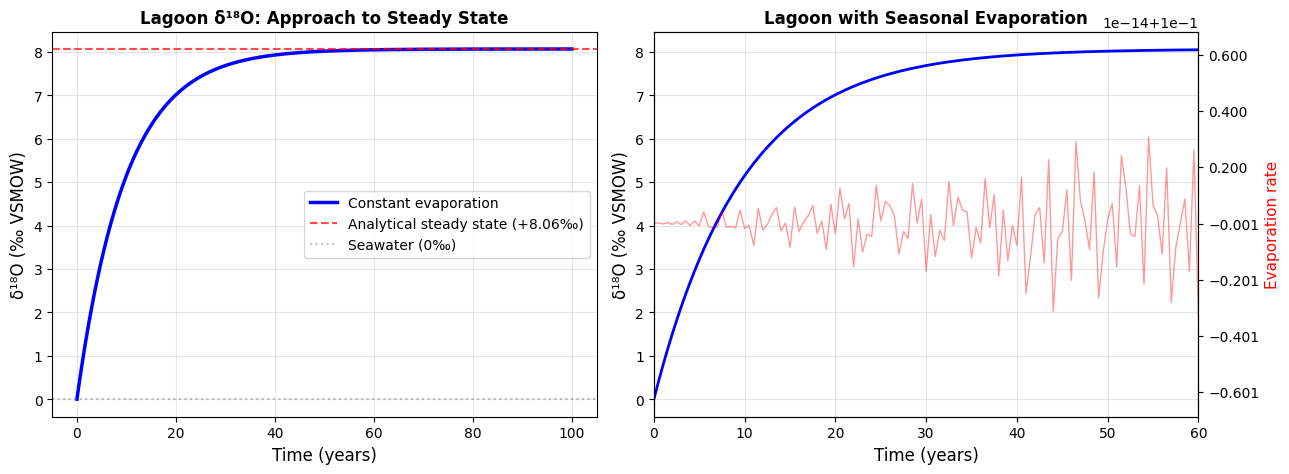

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(t_lag, d_lag, 'b-', linewidth=2.5, label='Constant evaporation')
ax1.axhline(y=d_ss, color='red', linestyle='--', alpha=0.7,
            label=f'Analytical steady state ({d_ss:+.2f}‰)')
ax1.axhline(y=0, color='gray', linestyle=':', alpha=0.5, label='Seawater (0‰)')
ax1.set_xlabel('Time (years)', fontsize=12)
ax1.set_ylabel('δ¹⁸O (‰ VSMOW)', fontsize=12)
ax1.set_title('Lagoon δ¹⁸O: Approach to Steady State',
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

ax2.plot(t_lag, d_lag_seas, 'b-', linewidth=2, label='δ¹⁸O')
ax2t = ax2.twinx()
ax2t.plot(t_lag, [evap_seasonal(t) for t in t_lag], 'r-',
          linewidth=1, alpha=0.4, label='Evaporation rate')
ax2t.set_ylabel('Evaporation rate', fontsize=11, color='red')
ax2.set_xlabel('Time (years)', fontsize=12)
ax2.set_ylabel('δ¹⁸O (‰ VSMOW)', fontsize=12)
ax2.set_title('Lagoon with Seasonal Evaporation',
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 60)

plt.tight_layout()
plt.show()

The lagoon reaches an isotopically enriched steady state: the lighter isotope is preferentially removed by evaporation, leaving the lagoon water heavier (more positive δ¹⁸O). With seasonal evaporation, the isotope ratio oscillates, which is a signal often recorded in carbonate sediments.

---

## 6.9 Sensitivity: What controls the Suess effect?

The magnitude of the atmospheric δ¹³C shift depends on the balance between fossil fuel input and ocean uptake. Let us explore how the air-sea exchange rate affects the isotopic response.

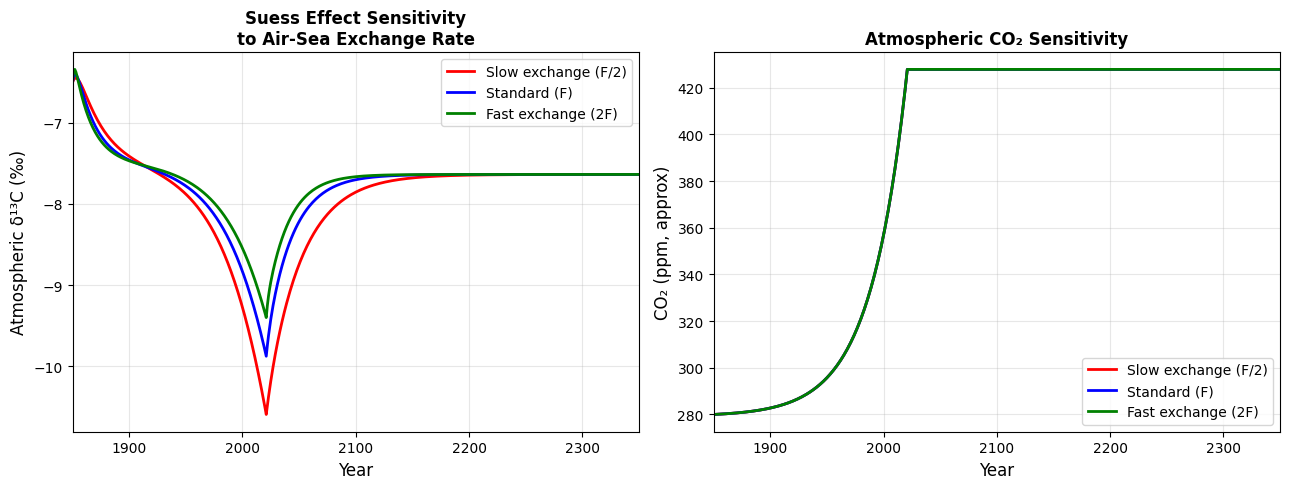

In [14]:
# Sensitivity to air-sea exchange rate
F_as_values = [46, 92, 184]  # half, normal, double exchange
labels = ['Slow exchange (F/2)', 'Standard (F)', 'Fast exchange (2F)']
colors = ['red', 'blue', 'green']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

for F_test, lab, col in zip(F_as_values, labels, colors):
    # Temporarily override fluxes
    F_as_old, F_sa_old = F_as, F_sa
    F_as_save, F_sa_save = F_as, F_sa
    
    # Monkey-patch (simple approach for demonstration)
    def make_rhs(F_ex):
        def rhs_test(t, y):
            M_a, M_s, M_d, r_a, r_s, r_d = y
            S = fossil_fuel_emission(t)
            a_as = 1 + eps_as / 1000
            a_sa = 1 + eps_sa / 1000
            
            dMa = -F_ex + F_ex + S  # balanced
            dMs = F_ex - F_ex - F_sd + F_ds
            dMd = F_sd - F_ds
            
            dra = (1.0/M_a) * (
                (a_sa*r_s - r_a)*F_ex - (a_as*r_a - r_a)*F_ex + (r_ff - r_a)*S
            )
            drs = (1.0/M_s) * (
                (a_as*r_a - r_s)*F_ex - (a_sa*r_s - r_s)*F_ex
                + (r_d - r_s)*F_ds
            )
            drd = (1.0/M_d) * ((r_s - r_d)*F_sd)
            
            return np.array([dMa, dMs, dMd, dra, drs, drd])
        return rhs_test
    
    rhs_test = make_rhs(F_test)
    
    t_vals = np.arange(0, t_end + dt/2, dt)
    y_test = np.zeros((len(t_vals), 6))
    y_test[0] = y0
    for n in range(len(t_vals) - 1):
        y_test[n+1] = y_test[n] + dt * rhs_test(t_vals[n], y_test[n])
    
    yrs = 1850 + t_vals
    ax1.plot(yrs, ratio_to_delta(y_test[:, 3]), color=col,
             linewidth=2, label=lab)
    ax2.plot(yrs, y_test[:, 0]/M_a0*280, color=col,
             linewidth=2, label=lab)

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Atmospheric δ¹³C (‰)', fontsize=12)
ax1.set_title('Suess Effect Sensitivity\nto Air-Sea Exchange Rate',
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1850, 2350)

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('CO₂ (ppm, approx)', fontsize=12)
ax2.set_title('Atmospheric CO₂ Sensitivity',
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1850, 2350)

plt.tight_layout()
plt.show()

**Faster air-sea exchange** dilutes the Suess effect: the light fossil carbon is shared more rapidly with the ocean, so the atmosphere doesn't become as isotopically depleted. Conversely, slow exchange concentrates the signal in the atmosphere.

This is why δ¹³C measurements, combined with mass balance models like Walker's, can constrain the rate of ocean carbon uptake.

---

## 6.10 Exercises

**Exercise 6.1:** Add a land biosphere reservoir (2000 GtC, δ¹³C = −25‰) with photosynthetic uptake (120 GtC/yr, ε = −20‰) and respiration (120 GtC/yr, no fractionation). How does this buffer change the Suess effect?

**Exercise 6.2:** Extend to ¹⁴C (radiocarbon). Add radioactive decay ($\lambda = 1/8267$ yr⁻¹) and cosmogenic production. Simulate the bomb-¹⁴C spike from nuclear testing (1950s–1960s) and its subsequent ocean uptake.

**Exercise 6.3:** Walker discusses using both ¹³C and ¹⁴C simultaneously to separate ocean and biosphere sinks. With the model from Exercise 6.1 and 6.2, show that the two isotopes give different constraints because ¹⁴C decays but ¹³C does not.

**Exercise 6.4:** Explore Walker's lagoon model with temperature-dependent fractionation: $\epsilon(T) = -9.3 + 0.05T$ (°C). Add a seasonal temperature cycle and show how the isotopic record in carbonate sediments encodes both temperature and evaporation signals.

**Exercise 6.5:** The "disequilibrium flux" — the atmosphere and ocean are never in isotopic equilibrium because the ocean's δ¹³C is always lagging behind the atmosphere's. Compute the disequilibrium flux of ¹³C as a function of time and show that it partly offsets the Suess effect.

---

## References

- Walker, J.C.G. (1991). *Numerical Adventures with Geochemical Cycles*. Oxford University Press. Chapter 6: "How to Calculate Isotope Ratios."
- Broecker, W.S. and Peng, T.-H. (1982). *Tracers in the Sea*. Eldigio Press, Palisades, New York.
- Keeling, C.D. (1979). The Suess Effect: ¹³Carbon-¹⁴Carbon Interrelations. *Environment International*, 2, 229–300.
- Graven, H.D. et al. (2017). Compiled records of carbon isotopes in atmospheric CO₂ for historical simulations (CMIP6). *Geosci. Model Dev.*, 10, 4405–4417.